# Math 189 Project Notebook - Investigating Flight Delays

## Setup and Data Cleaning

In [49]:
pip install gdown

Note: you may need to restart the kernel to use updated packages.


In [50]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [35]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import ttest_ind

In [3]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

In [4]:
# reading in the csv file from Google Drive

import gdown

file_id = "1yQDnF1A54d2CYv_CqceyFLzBCw6FFGb4"
url = f"https://drive.google.com/uc?id={file_id}"

filename = "flight_data.csv"
gdown.download(url, filename, quiet=False)

airline_data = pd.read_csv(filename, low_memory = False)

Downloading...
From (original): https://drive.google.com/uc?id=1yQDnF1A54d2CYv_CqceyFLzBCw6FFGb4
From (redirected): https://drive.google.com/uc?id=1yQDnF1A54d2CYv_CqceyFLzBCw6FFGb4&confirm=t&uuid=3afa5767-39ec-462e-9041-57c2051d979f
To: /workspaces/Math189Project/flight_data.csv
100%|██████████| 714M/714M [00:05<00:00, 124MB/s]  


In [5]:
# filtering the data to get all observations after the year 2000 and sorting by year

df = airline_data[airline_data['Year'] >= 2000].sort_values(by = 'Year').reset_index().drop(columns = ['index'])

In [6]:
# selecting only relevant and useful columns from data

df = df[[
 'DayOfWeek',
 'FlightDate',
 'Reporting_Airline',
 'Origin',
 'OriginStateName',
 'Dest',
 'DestStateName',
 'DepTime',
 'DepDelay',
 'DepartureDelayGroups',
 'TaxiOut',
 'WheelsOff',
 'WheelsOn',
 'TaxiIn',
 'ArrTime',
 'ArrDelay',
 'ArrivalDelayGroups',
 'Cancelled',
 'Diverted',
 'ActualElapsedTime',
 'AirTime',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay']]

In [51]:
# this will be the data frame we are working with

df.head()

,DayOfWeek,FlightDate,Reporting_Airline,Origin,OriginStateName,Dest,DestStateName,DepTime,DepDelay,DepartureDelayGroups,TaxiOut,WheelsOff,WheelsOn,TaxiIn,ArrTime,ArrDelay,ArrivalDelayGroups,Cancelled,Diverted,ActualElapsedTime,AirTime,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1,3,2000-05-10,DL,JFK,New York,ATL,Georgia,2010.0,160.0,10.0,101.0,2151.0,2334.0,8.0,2342.0,222.0,12.0,0.0,0.0,212.0,103.0,NaN,NaN,NaN,NaN,NaN
2,2,2000-05-30,HP,LAS,Nevada,LAX,California,1948.0,2.0,0.0,20.0,2008.0,2052.0,12.0,2104.0,9.0,0.0,0.0,0.0,76.0,44.0,NaN,NaN,NaN,NaN,NaN
3,5,2000-03-03,DL,LAS,Nevada,LAX,California,602.0,2.0,0.0,11.0,613.0,658.0,11.0,709.0,7.0,0.0,0.0,0.0,67.0,45.0,NaN,NaN,NaN,NaN,NaN
4,1,2000-08-07,WN,HOU,Texas,MSY,Louisiana,853.0,8.0,0.0,5.0,858.0,950.0,5.0,955.0,10.0,0.0,0.0,0.0,62.0,52.0,NaN,NaN,NaN,NaN,NaN
5,6,2000-11-11,US,IAD,Virginia,BOS,Massachusetts,742.0,-3.0,-1.0,12.0,754.0,912.0,12.0,924.0,7.0,0.0,0.0,0.0,102.0,78.0,NaN,NaN,NaN,NaN,NaN


## Exploratory Data Analysis

## ADD REMAINING EDA AND PLOTS IN THIS SECTION

In [11]:
# looking at departure delay groups

grouped_df = df.groupby('DepartureDelayGroups')
grouped_df.count()

,DayOfWeek,FlightDate,Reporting_Airline,Origin,OriginStateName,Dest,DestStateName,DepTime,DepDelay,TaxiOut,WheelsOff,WheelsOn,TaxiIn,ArrTime,ArrDelay,ArrivalDelayGroups,Cancelled,Diverted,ActualElapsedTime,AirTime,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
DepartureDelayGroups,,,,,,,,,,,,,,,,,,,,,,,,,
-2.0,3682,3682,3682,3682,3682,3682,3682,3682,3682,3681,3681,3674,3675,3675,3671,3671,3682,3682,3671,3671,35,35,35,35,35
-1.0,688443,688443,688443,688443,688443,688443,688443,688443,688443,688339,688334,687811,687832,687832,687161,687161,688443,688443,687176,687176,22160,22160,22160,22160,22160
0.0,384083,384083,384083,384083,384083,384083,384083,384083,384083,384014,384010,383539,383558,383558,383175,383175,384083,384083,383186,383185,33373,33373,33373,33373,33373
1.0,91057,91057,91057,91057,91057,91057,91057,91057,91057,91030,91027,90868,90873,90873,90727,90727,91057,91057,90727,90727,42831,42831,42831,42831,42831
2.0,45741,45741,45741,45741,45741,45741,45741,45741,45741,45721,45720,45597,45602,45602,45524,45524,45741,45741,45524,45524,36038,36038,36038,36038,36038
3.0,27835,27835,27835,27835,27835,27835,27835,27835,27835,27821,27820,27743,27747,27747,27687,27687,27835,27835,27687,27687,23733,23733,23733,23733,23733
4.0,18721,18721,18721,18721,18721,18721,18721,18721,18721,18702,18702,18651,18655,18655,18623,18623,18721,18721,18623,18623,16123,16123,16123,16123,16123
5.0,13110,13110,13110,13110,13110,13110,13110,13110,13110,13101,13101,13063,13070,13070,13038,13038,13110,13110,13038,13038,11362,11362,11362,11362,11362
6.0,9629,9629,9629,9629,9629,9629,9629,9629,9629,9617,9617,9579,9580,9580,9555,9555,9629,9629,9555,9555,8334,8334,8334,8334,8334


<Axes: xlabel='DepartureDelayGroups'>

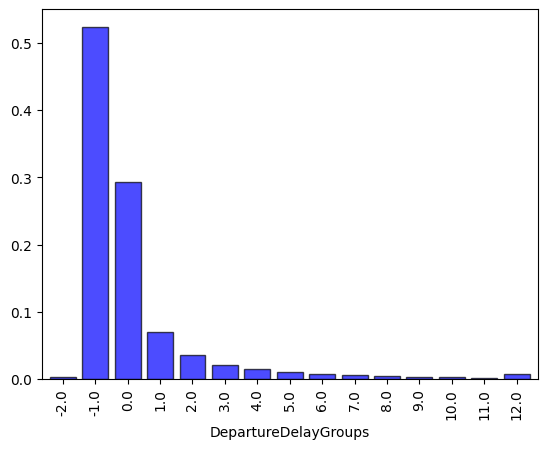

In [12]:
# plotting histogram of departure delay groups

grouped_freq = grouped_df.size()
density = grouped_freq / grouped_freq.sum()
density.plot(kind='bar', width=0.8, alpha=0.7, color='blue', edgecolor='black')

In [15]:
# looking at only significant delays - the entries with a departure delay of >= 30 minutes

significant_delays = df[df['DepartureDelayGroups'] >= 3]

In [14]:
significant_delays

,DayOfWeek,FlightDate,Reporting_Airline,Origin,OriginStateName,Dest,DestStateName,DepTime,DepDelay,DepartureDelayGroups,TaxiOut,WheelsOff,WheelsOn,TaxiIn,ArrTime,ArrDelay,ArrivalDelayGroups,Cancelled,Diverted,ActualElapsedTime,AirTime,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1,3,2000-05-10,DL,JFK,New York,ATL,Georgia,2010.0,160.0,10.0,101.0,2151.0,2334.0,8.0,2342.0,222.0,12.0,0.0,0.0,212.0,103.0,NaN,NaN,NaN,NaN,NaN
12,5,2000-12-22,DL,ONT,California,SLC,Utah,2110.0,175.0,11.0,18.0,2128.0,2348.0,1.0,2349.0,170.0,11.0,0.0,0.0,99.0,80.0,NaN,NaN,NaN,NaN,NaN
14,5,2000-01-07,AA,EWR,New Jersey,EGE,Colorado,1800.0,50.0,3.0,15.0,1815.0,2033.0,6.0,2039.0,36.0,2.0,0.0,0.0,279.0,258.0,NaN,NaN,NaN,NaN,NaN
17,4,2000-01-20,NW,DTW,Michigan,LAS,Nevada,1020.0,55.0,3.0,39.0,1059.0,1211.0,6.0,1217.0,77.0,5.0,0.0,0.0,297.0,252.0,NaN,NaN,NaN,NaN,NaN
23,2,2000-07-25,US,MDW,Illinois,BWI,Maryland,1927.0,87.0,5.0,11.0,1938.0,2202.0,3.0,2205.0,79.0,5.0,0.0,0.0,98.0,84.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338872,3,2020-02-26,OH,CLT,North Carolina,RIC,Virginia,1714.0,56.0,3.0,25.0,1739.0,1822.0,11.0,1833.0,63.0,4.0,0.0,0.0,79.0,43.0,11.0,0.0,7.0,0.0,45.0
1338887,6,2020-01-04,WN,LAS,Nevada,BNA,Tennessee,1750.0,85.0,5.0,14.0,1804.0,2259.0,5.0,2304.0,69.0,4.0,0.0,0.0,194.0,175.0,0.0,0.0,3.0,0.0,66.0
1338909,7,2020-03-01,WN,MSY,Louisiana,TPA,Florida,2247.0,57.0,3.0,11.0,2258.0,59.0,4.0,103.0,48.0,3.0,0.0,0.0,76.0,61.0,0.0,0.0,0.0,0.0,48.0
1338920,4,2020-02-06,DL,IND,Indiana,ATL,Georgia,1302.0,117.0,7.0,27.0,1329.0,1500.0,6.0,1506.0,141.0,9.0,0.0,0.0,124.0,91.0,0.0,0.0,24.0,0.0,117.0


<Axes: ylabel='Reporting_Airline'>

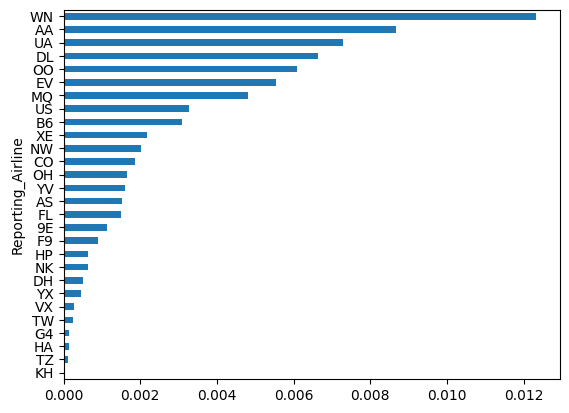

In [17]:
# plotting bar chart of percentage of delays recorded in each airline

(significant_delays.groupby("Reporting_Airline").count()['Dest'] / df.groupby("Reporting_Airline").count()['Dest'].sum()).sort_values().plot(kind="barh")

<Axes: ylabel='Origin'>

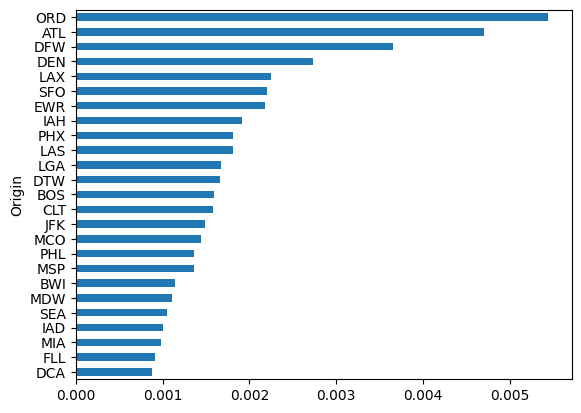

In [18]:
# plotting bar chart of percentage of delays recorded for the top 25 airports

(significant_delays.groupby("Origin").count()['Dest'] / df.groupby("Origin").count()['Dest'].sum()).sort_values().tail(25).plot(kind="barh")

## Hypothesis Testing and Analysis

In [23]:
# setting up data to conduct a hypothesis with busier vs less busier airports

df.dropna(subset = ['DepDelay'], inplace=True)

airport_counts = df.groupby('Origin').count().sort_values(by = 'Dest')
airport_counts = airport_counts.reset_index().iloc[:, :2]
airport_counts.columns = ['Origin', 'Counts']

less_busy_airports = airport_counts[airport_counts['Counts'] < airport_counts['Counts'].median()]['Origin'].to_list()
less_busy = df[df['Origin'].isin(less_busy_airports)]
more_busy_airports = airport_counts[airport_counts['Counts'] > airport_counts['Counts'].median()]['Origin'].to_list()
more_busy = df[df['Origin'].isin(more_busy_airports)]

Null hypothesis: There is no significant difference in the mean departure delay values between the busiest airports vs the less busier airports

Alternate hypothesis: The mean departure delay of the less busy airports is less than that of the busier airports

In [36]:
top_delays = more_busy['DepDelay']
bottom_delays = less_busy['DepDelay']

t_statistic, p_value = ttest_ind(bottom_delays, top_delays, alternative='less')
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-statistic: -8.771371369269811
P-value: 8.835366407516052e-19


In [37]:
[top_delays.mean(), bottom_delays.mean()]

[9.095169419268782, 6.931420507996237]

In [38]:
airline_counts = df.groupby('Reporting_Airline').count().sort_values(by = 'Dest')
airline_counts = airline_counts.reset_index().iloc[:, :2]
airline_counts.columns = ['Airline', 'Counts']

less_busy_airlines = airline_counts[airline_counts['Counts'] < airline_counts['Counts'].median()]['Airline'].to_list()
less_busy = df[df['Reporting_Airline'].isin(less_busy_airlines)]
more_busy_airlines = airline_counts[airline_counts['Counts'] > airline_counts['Counts'].median()]['Airline'].to_list()
more_busy = df[df['Reporting_Airline'].isin(more_busy_airlines)]

Null hypothesis: There is no significant difference in the mean departure delay values between the busiest airlines vs the less busier airlines

Alternate hypothesis: The mean departure delay of the less busy airlines is less than that of the busier airlines

In [40]:
top_delays = more_busy['DepDelay']
bottom_delays = less_busy['DepDelay']

t_statistic, p_value = ttest_ind(bottom_delays, top_delays, alternative='less')
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-statistic: -3.7289848394242275
P-value: 9.613039286074074e-05


In [39]:
[top_delays.mean(), bottom_delays.mean()]

[9.095169419268782, 6.931420507996237]

## ADD REMAINING HYPOTHESIS TESTS HERE